In [1]:
import numpy  as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/house_rental_data.csv (1).txt')
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [5]:
df.describe()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [6]:
df.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [7]:

df.columns

Index(['Unnamed: 0', 'Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room',
       'Bathroom', 'Price'],
      dtype='object')

Matplotlib visualizations

<BarContainer object of 7 artists>

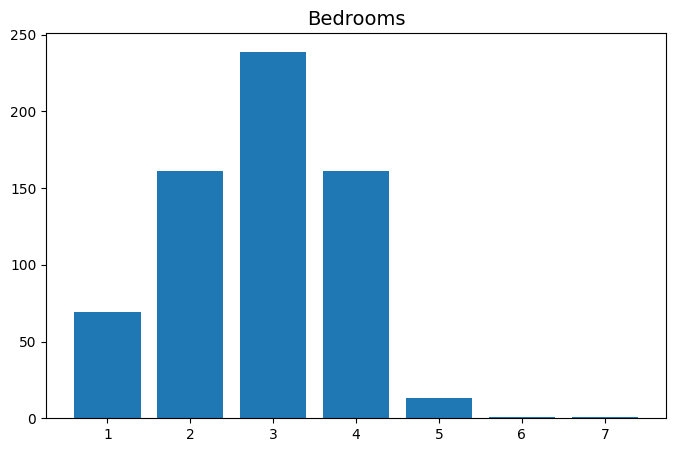

In [8]:
plt.figure(figsize=(8,5))
plt.title("Bedrooms", fontsize=14)
plt.bar(x=df['Bedroom'].value_counts().index,
        height=df.Bedroom.value_counts().values)

(array([ 38., 230., 167., 126.,  46.,  20.,  15.,   2.,   0.,   1.]),
 array([ 1. ,  4.7,  8.4, 12.1, 15.8, 19.5, 23.2, 26.9, 30.6, 34.3, 38. ]),
 <BarContainer object of 10 artists>)

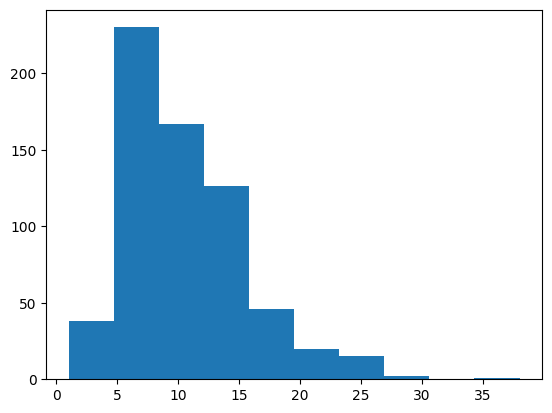

In [9]:
plt.hist(x=df['TotalFloor'])

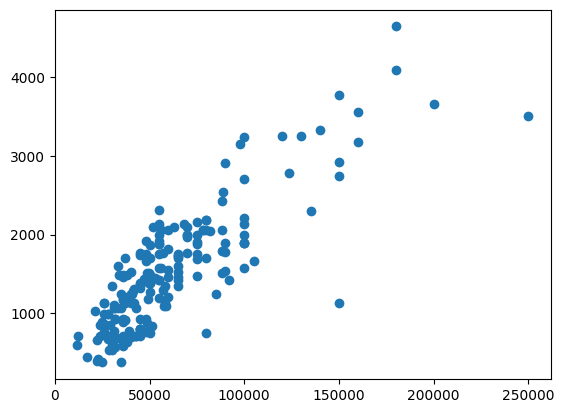

In [10]:
sample = df.sample(n=200, random_state=42)
plt.scatter(x=sample['Price'], y=sample['Sqft'])

(array([[ 52.,  16.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 90., 134.,  50.,   4.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  3.,  29.,  79.,  40.,   2.,   1.,   0.,   0.,   0.,   0.],
        [  2.,   4.,  35.,  28.,  10.,   4.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   6.,   9.,   4.,   2.,   0.,   0.,   0.,   0.],
        [  0.,   2.,   3.,   3.,   7.,   5.,   1.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   2.,   4.,   0.,   0.,   0.,   1.],
        [  0.,   0.,   0.,   0.,   1.,   0.,   7.,   1.,   0.,   1.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.]]),
 array([  6100.,  30490.,  54880.,  79270., 103660., 128050., 152440.,
        176830., 201220., 225610., 250000.]),
 array([ 359.358,  909.069, 1458.78 , 2008.491, 2558.202, 3107.913,
        3657.624, 4207.335, 4757.046, 5306.757, 5856.468]),
 <matplotlib.collections.QuadMesh at 0x7ba396dae650>)

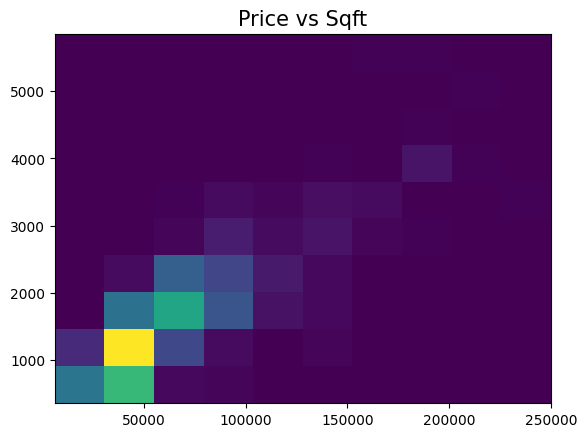

In [11]:
plt.title("Price vs Sqft", fontsize=15)
plt.hist2d(x=df.Price, y=df.Sqft)

HeatMap Visualization

<Axes: >

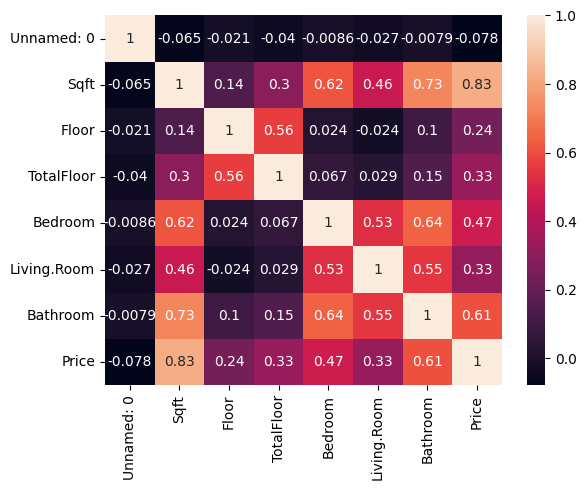

In [12]:
sns.heatmap(df.corr(),annot=True)

Training the data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df[['Unnamed: 0', 'Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room',
       'Bathroom']]
y = df["Price"]

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

Using the Linear Regresson model

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train,y_train)

Predicting the data

In [18]:
y_pred = lr.predict(X_train)
y_pred

array([ 33778.57638814,  29430.16587249,  31900.8890849 ,  88196.06329945,
        90451.25828805,  81348.59481344,  86049.58360025,  80811.88964203,
        38377.72005131,  53573.82635521,  67634.65340457,  68275.05117736,
        45374.50156693,  34066.53062097,  42287.69049856,  59098.82925034,
        26959.22305741, 115829.73268683, 120929.59261   ,  58637.00756946,
        55877.50951676,  54474.2957368 ,  84198.0092373 ,  65566.07345107,
        41893.67575508,  49335.81140449,  62158.71373371,  70844.57813901,
        78632.82504223,  31166.16445499,  29612.83310903,  76195.84302472,
        93430.80318904,  36278.08947208,  40185.56396287,  74156.77332983,
       118339.64404027,  59544.35627432, 118569.80003828,  36413.0465475 ,
        27376.27508649,  56940.18434532,  58158.79224159,  60421.00315787,
        29625.38737008,  76492.95915698,  76208.50482056,  48176.56774122,
        69311.09132272,  54786.26597937, 100845.72042089, 112264.02902452,
        49449.21534918,  

Creating a DataFrame for better understanding the actual and predicted data

In [19]:
predicted_dataframe = pd.DataFrame({"Actual_data" : y_train , "predicted_data" : y_pred})
predicted_dataframe

,Actual_data,predicted_data
118,22000,33778.576388
235,36000,29430.165872
449,36000,31900.889085
175,82000,88196.063299
356,55000,90451.258288
...,...,...
9,65000,55111.740875
359,98000,79842.108704
192,75000,97069.433203
629,45000,58102.865686
